In [104]:
import pandas as pd
import seaborn as sns

df_washington = pd.read_csv("data/washington.csv", sep = ";")
# df_convention = pd.read_csv("data/convention.csv", sep = ";")
# df_sts = pd.read_csv("data/sts.csv", sep = ";")

def filter(df,amont,aval):
    df = df[df["Libelle noeud amont"]==amont]
    df = df[df["Libelle noeud aval"]==aval]
    return df

def set_date(df):
    df["Date et heure de comptage"] = pd.to_datetime(df_washington["Date et heure de comptage"],format='%Y-%m-%dT%H:%M:%S%z')
    return df


df_washington = filter(df_washington,"Av_Champs_Elysees-Washington","Av_Champs_Elysees-Berri")
df_washington = set_date(df_washington)
df_washington = df_washington.sort_values(by = "Date et heure de comptage")
df_washington = df_washington.interpolate() #remove Nan by interpolation
df_washington = df_washington.reset_index()
# df_sts = filter(df_sts,"Lecourbe-Convention","Convention-Blomet")
# df_convention = filter(df_convention,"Sts_Peres-Voltaire","Sts_Peres-Universite")

df_washington.head()


,index,Identifiant arc,Libelle,Date et heure de comptage,Débit horaire,Taux d'occupation,Etat trafic,Identifiant noeud amont,Libelle noeud amont,Identifiant noeud aval,Libelle noeud aval,Etat arc,Date debut dispo data,Date fin dispo data,geo_point_2d,geo_shape
0,6712,4264,AV_Champs_Elysees,2019-11-01 04:00:00+01:00,746.0,10.98889,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."
1,6713,4264,AV_Champs_Elysees,2019-11-01 05:00:00+01:00,549.0,7.40722,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."
2,6714,4264,AV_Champs_Elysees,2019-11-01 06:00:00+01:00,503.0,7.66667,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."
3,2607,4264,AV_Champs_Elysees,2019-11-01 07:00:00+01:00,500.0,4.75500,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."
4,2608,4264,AV_Champs_Elysees,2019-11-01 08:00:00+01:00,525.0,5.37389,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."


In [105]:
df_washington = df_washington.sort_values(by = "Date et heure de comptage")

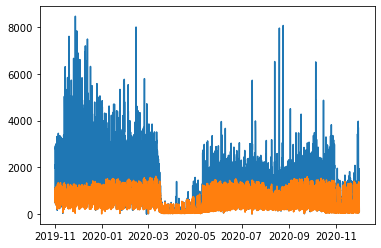

In [106]:
import matplotlib.pyplot as plt

plt.plot(df_washington["Date et heure de comptage"],df_washington["Taux d'occupation"]*100)
plt.plot(df_washington["Date et heure de comptage"],df_washington["Débit horaire"])

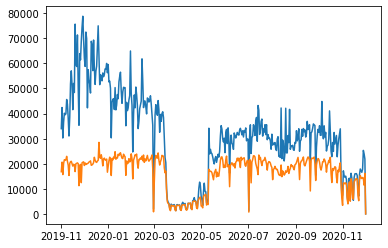

In [107]:
#aggregate by day
df_washington["date"] = [d.date() for d in df_washington["Date et heure de comptage"]]

df_by_date = df_washington.groupby("date").agg("sum").reset_index()
plt.plot(df_by_date["date"],df_by_date["Taux d'occupation"]*100)
plt.plot(df_by_date["date"],df_by_date["Débit horaire"])


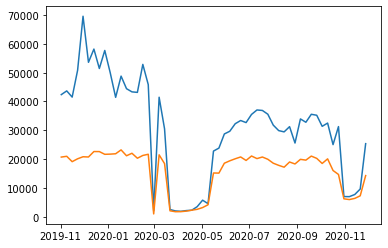

In [108]:
#evolution for saturdays

df_saturday = df_by_date[[d.weekday()==5 for d in df_by_date["date"]]] #weekday = 5 for saturday 

plt.plot(df_saturday["date"],df_saturday["Taux d'occupation"]*100)
plt.plot(df_saturday["date"],df_saturday["Débit horaire"])



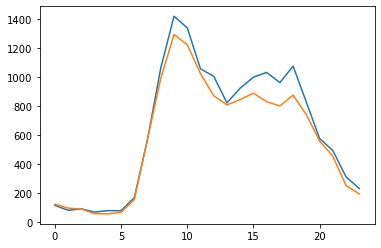

In [109]:
from datetime import date

one_day = date(2020,11,20)

df_washington["hour"] = [d.hour for d in df_washington["Date et heure de comptage"]]


df_one_day = df_washington[df_washington["date"] == one_day]
plt.plot(df_one_day["hour"],df_one_day["Taux d'occupation"]*100)
plt.plot(df_one_day["hour"],df_one_day["Débit horaire"])



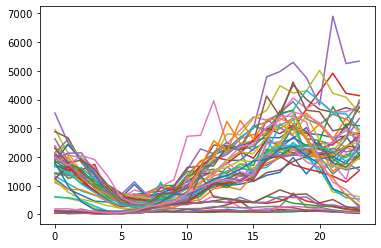

In [110]:
#taux d'occupation horaire des n derniers samedis

n_saturdays = 100

for day in df_saturday.date[-n_saturdays:]:
    df_day = df_washington[df_washington["date"] == day]
    plt.plot(df_day["hour"],df_day["Taux d'occupation"]*100)
    # plt.plot(df_day["hour"],df_day["Débit horaire"])

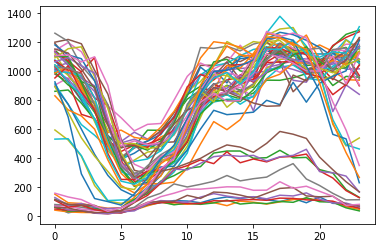

In [111]:
#debit horaire des n derniers samedis

for day in df_saturday.date[-n_saturdays:]:
    df_day = df_washington[df_washington["date"] == day]
    # plt.plot(df_day["hour"],df_day["Taux d'occupation"]*100)
    plt.plot(df_day["hour"],df_day["Débit horaire"])

In [112]:
#######
#features
#######
df_X = pd.DataFrame({"dt": df_washington["Date et heure de comptage"],"debit" : df_washington["Débit horaire"],"occupation" : df_washington["Taux d'occupation"],"etat" : df_washington["Etat trafic"]})
df_X

,dt,debit,occupation,etat
0,2019-11-01 04:00:00+01:00,746.0,10.98889,Fluide
1,2019-11-01 05:00:00+01:00,549.0,7.40722,Fluide
2,2019-11-01 06:00:00+01:00,503.0,7.66667,Fluide
3,2019-11-01 07:00:00+01:00,500.0,4.75500,Fluide
4,2019-11-01 08:00:00+01:00,525.0,5.37389,Fluide
...,...,...,...,...
9447,2020-11-30 20:00:00+01:00,784.0,9.80056,Fluide
9448,2020-11-30 21:00:00+01:00,519.0,6.37445,Fluide
9449,2020-11-30 22:00:00+01:00,326.0,4.76667,Fluide
9450,2020-11-30 23:00:00+01:00,216.0,2.63333,Fluide


In [113]:
def etat_to_num(etat):
    if etat=="Fluide":
        return 1
    elif etat=="Pré-saturé":
        return 2
    elif etat=="Saturé":
        return 3
    elif etat=="Bloqué":
        return 4
    else:
        return "Nan"
   

In [162]:
df_X["hour"]= [d.hour for d in df_X["dt"]]
df_X["weekday"]= [d.weekday() for d in df_X["dt"]]
df_X["month"]= [d.month for d in df_X["dt"]]
df_X["mean_week"] = df_X.debit.rolling(24*7).mean()
df_X["mean_past_week"] = df_X.debit.rolling(24*7).mean().shift(24*5)
df_X["etat"] = [etat_to_num(e) for e in df_X.etat]

In [163]:
df_X["etat"].value_counts()

Nan    9452
Name: etat, dtype: int64

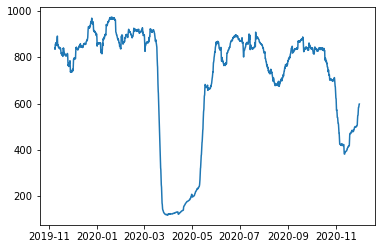

In [164]:
plt.plot(df_X.dt,df_X.mean_week)

In [165]:
df_X

,dt,debit,occupation,etat,hour,weekday,month,mean_week,mean_past_week
0,2019-11-01 04:00:00+01:00,746.0,10.98889,Nan,4,4,11,NaN,NaN
1,2019-11-01 05:00:00+01:00,549.0,7.40722,Nan,5,4,11,NaN,NaN
2,2019-11-01 06:00:00+01:00,503.0,7.66667,Nan,6,4,11,NaN,NaN
3,2019-11-01 07:00:00+01:00,500.0,4.75500,Nan,7,4,11,NaN,NaN
4,2019-11-01 08:00:00+01:00,525.0,5.37389,Nan,8,4,11,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9447,2020-11-30 20:00:00+01:00,784.0,9.80056,Nan,20,0,11,598.190476,501.428571
9448,2020-11-30 21:00:00+01:00,519.0,6.37445,Nan,21,0,11,598.791667,501.404762
9449,2020-11-30 22:00:00+01:00,326.0,4.76667,Nan,22,0,11,598.946429,501.529762
9450,2020-11-30 23:00:00+01:00,216.0,2.63333,Nan,23,0,11,598.922619,501.148810


In [179]:
df_fin=df_X[24*7+24*5:]
X=df_fin[["hour","weekday","mean_past_week"]]
Y_occupation=df_fin[["occupation"]]
Y_debit=df_fin[["debit"]]

In [180]:
print(Y_occupation.isna().value_counts())
print(X.isna().value_counts())

occupation
False         9164
dtype: int64
hour   weekday  mean_past_week
False  False    False             9164
dtype: int64


In [209]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

i_split = int(len(X)*0.6)
# i_split=3200
X_train = X[:i_split].values
y_train = Y_occupation[:i_split].values
X_test = X[i_split:].values
y_test = Y_occupation[i_split:].values

model = RandomForestRegressor(min_samples_leaf=5)
model.fit(X_train,y_train)
pred = model.predict(X_test)


In [ ]:
y_test.reset_index().occupation

5498


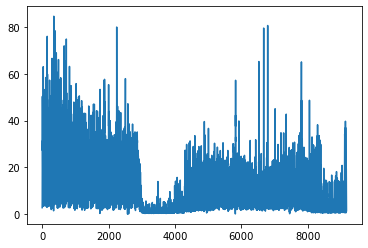

In [212]:
plt.plot(Y_occupation.values)
print(i_split)

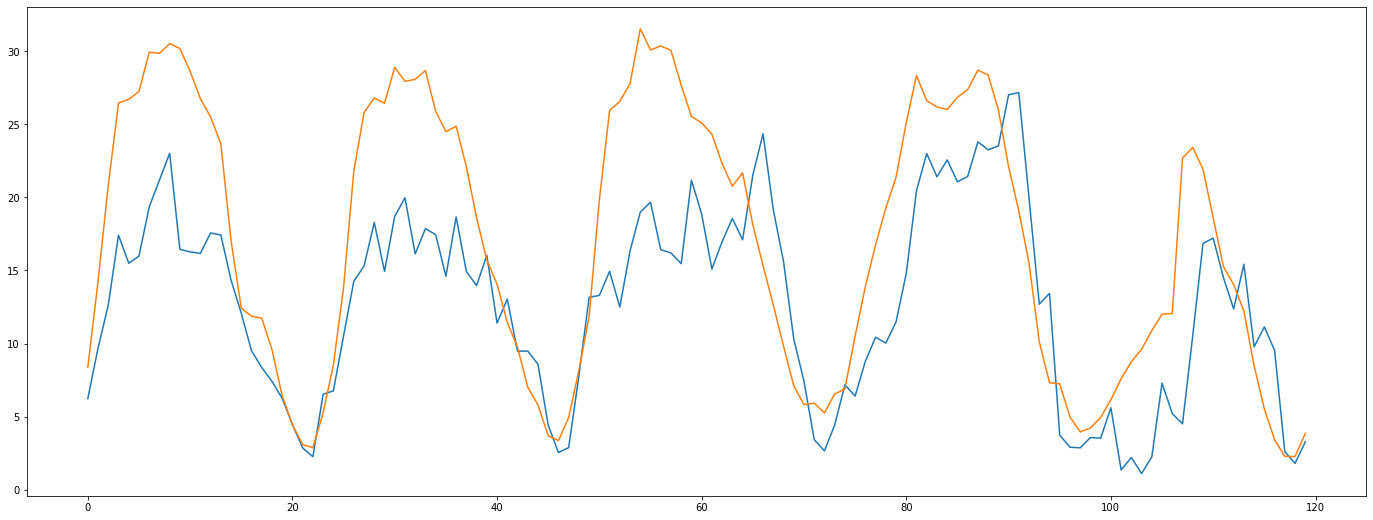

In [211]:
plt.figure(figsize=(24,9))
plt.plot(y_test[:24*5])
plt.plot(pred[:24*5])
plt.show()

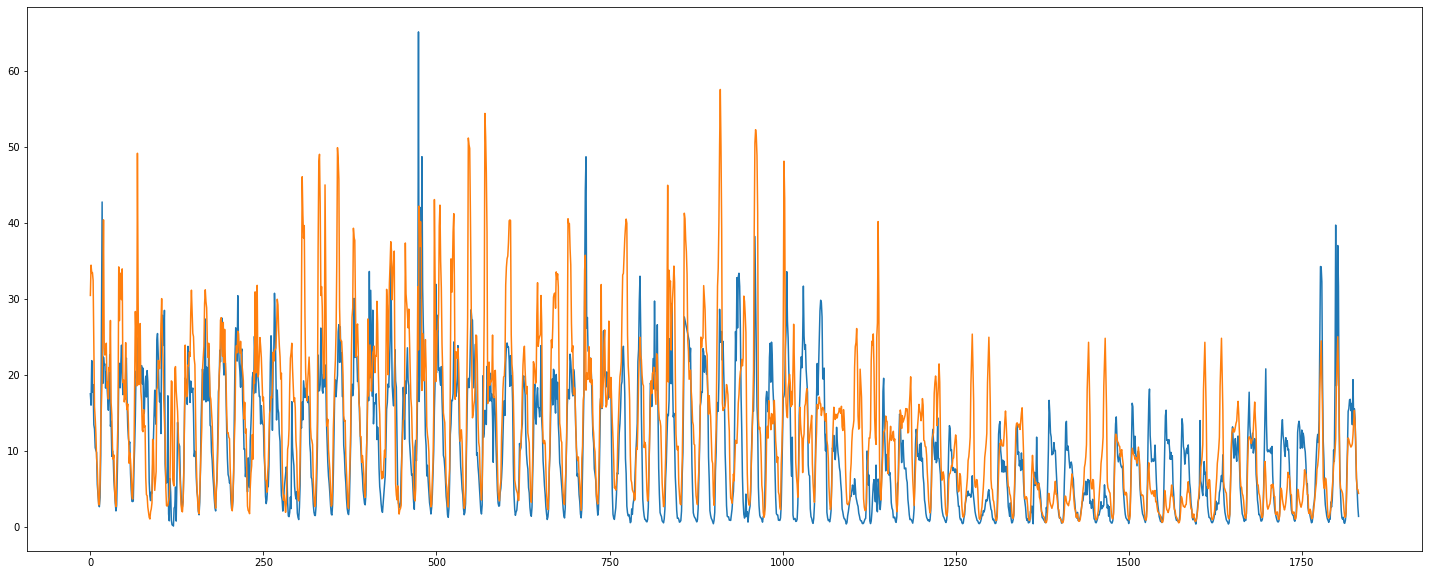

In [191]:
plt.figure(figsize=(25,10))
plt.plot(y_test)
plt.plot(pred)
plt.show()

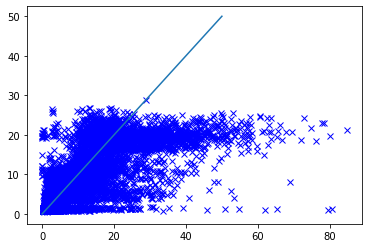

In [124]:
plt.plot(y_test,pred,"bx")
plt.plot([0,50],[0,50])


In [94]:
[0,1,2,3,4,5][3:]

[3, 4, 5]

In [86]:
y_train

,occupation
6248,10.87389
2856,14.51278
1974,0.00000
1577,2.88278
2369,16.25222
...,...
1621,9.53223
6386,14.10389
5888,22.12500
931,16.56334
